## Import Package and Data

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [12]:
data = 'E:/GSB Analisis Data/Klien Andy/Train test.csv'
df = pd.read_csv(data,index_col = 'bcn_num')

In [13]:
# preview the dataset
df.head()

,test_outcome,CountCases,CountWIFICases,obs_count,upgrade_count,max_uptime_days,min_uptime_hr,max_uptime_hr,wandown_cnt,lanwpktdrop,lanwpktdrop_5g,lanpwr_below100,avg_lanwpkterred,avg_lanwpkterred_5g,minrssi,maxrssi,max_assoc_dev,channel_change
bcn_num,,,,,,,,,,,,,,,,,,
NL20H682,0,2,0,43.0,2.0,30.0,5.0,723.0,0.0,0.0,618831.0,0.0,0.0,2623.0,54.0,87.0,4.0,2.0
NM20BGH8,0,3,0,47.0,1.0,34.0,2.0,820.0,0.0,0.0,3592059.0,0.0,0.0,266.0,57.0,88.0,3.0,3.0
NS206FC5,0,0,0,4.0,1.0,4.0,31.0,103.0,0.0,0.0,0.0,0.0,0.0,519.0,NaN,NaN,0.0,1.0
NM20HLAB,0,9,1,51.0,2.0,73.0,6.0,1760.0,0.0,0.0,609518.0,0.0,0.0,385.0,NaN,NaN,4.0,2.0
NN21CJHA,0,0,0,45.0,2.0,61.0,15.0,1484.0,0.0,32017.0,181616.0,0.0,844.0,4436.0,45.0,68.0,3.0,2.0


In [14]:
# view dimensions of dataset
df.shape

(460696, 18)

 We can see that there are 460696 instances and 18 variables in the dataset

In [7]:
col_names = df.columns
col_names

Index(['bcn_num', 'test_outcome', 'CountCases', 'CountWIFICases', 'obs_count',
       'upgrade_count', 'max_uptime_days', 'min_uptime_hr', 'max_uptime_hr',
       'wandown_cnt', 'lanwpktdrop', 'lanwpktdrop_5g', 'lanpwr_below100',
       'avg_lanwpkterred', 'avg_lanwpkterred_5g', 'minrssi', 'maxrssi',
       'max_assoc_dev', 'channel_change'],
      dtype='object')

In [10]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460696 entries, 0 to 460695
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   test_outcome         460696 non-null  int64  
 1   CountCases           460696 non-null  int64  
 2   CountWIFICases       460696 non-null  int64  
 3   obs_count            396706 non-null  float64
 4   upgrade_count        396706 non-null  float64
 5   max_uptime_days      375771 non-null  float64
 6   min_uptime_hr        375771 non-null  float64
 7   max_uptime_hr        375771 non-null  float64
 8   wandown_cnt          396706 non-null  float64
 9   lanwpktdrop          375771 non-null  float64
 10  lanwpktdrop_5g       375771 non-null  float64
 11  lanpwr_below100      396706 non-null  float64
 12  avg_lanwpkterred     375771 non-null  float64
 13  avg_lanwpkterred_5g  375771 non-null  float64
 14  minrssi              333243 non-null  float64
 15  maxrssi          

## Identify Missing Value

In [11]:
# check missing values in variables

df.isnull().sum()

test_outcome                0
CountCases                  0
CountWIFICases              0
obs_count               63990
upgrade_count           63990
max_uptime_days         84925
min_uptime_hr           84925
max_uptime_hr           84925
wandown_cnt             63990
lanwpktdrop             84925
lanwpktdrop_5g          84925
lanpwr_below100         63990
avg_lanwpkterred        84925
avg_lanwpkterred_5g     84925
minrssi                127453
maxrssi                127453
max_assoc_dev           84925
channel_change          63990
dtype: int64

<AxesSubplot:>

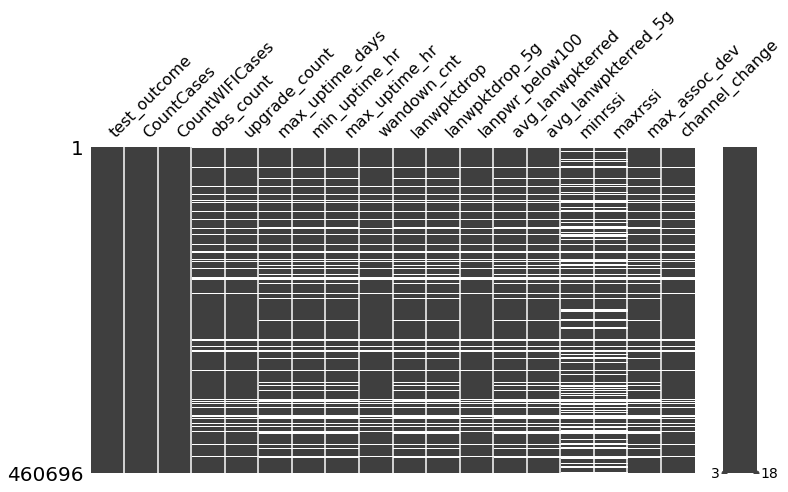

In [21]:
# visualize missing values in dataset 
import missingno as msno 
# Visualize missing values as a matrix 
msno.matrix(df,figsize=(12,6)) 


<AxesSubplot:>

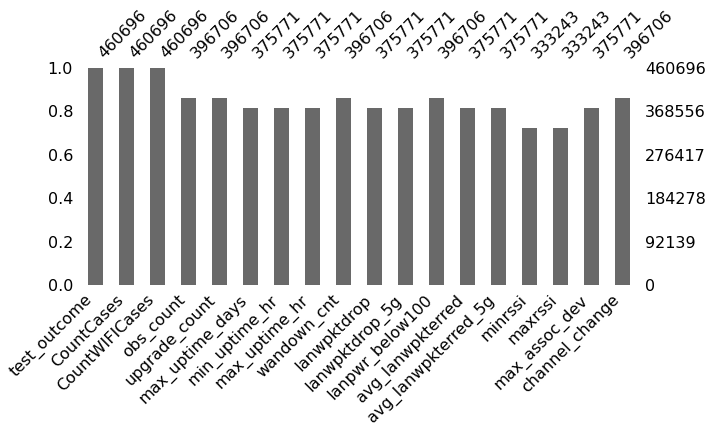

In [23]:
# Visualize the number of missing 
# values as a bar chart 
msno.bar(df,figsize=(10,4)) 

In [25]:
# find out the percentage of misssing vale in each column
Percent_Missing_Value = df.isnull().sum()*100/len(df)
Percent_Missing_Value

test_outcome            0.000000
CountCases              0.000000
CountWIFICases          0.000000
obs_count              13.889854
upgrade_count          13.889854
max_uptime_days        18.434065
min_uptime_hr          18.434065
max_uptime_hr          18.434065
wandown_cnt            13.889854
lanwpktdrop            18.434065
lanwpktdrop_5g         18.434065
lanpwr_below100        13.889854
avg_lanwpkterred       18.434065
avg_lanwpkterred_5g    18.434065
minrssi                27.665315
maxrssi                27.665315
max_assoc_dev          18.434065
channel_change         13.889854
dtype: float64

## Missing Value Treatment

#### List wise Deletion of Missing Value

In [63]:
df_listwise = df.dropna()

#### Pair wise Deletion of Missing Value

In [32]:
## Total no of samples where all column has NaN
df[(df["obs_count"].isnull()==True)&
    (df["upgrade_count"].isnull()==True)&
    (df["max_uptime_days"].isnull()==True)&
   (df["min_uptime_hr"].isnull()==True)&
   (df["max_uptime_hr"].isnull()==True)&
   (df["wandown_cnt"].isnull()==True)&
   (df["lanwpktdrop"].isnull()==True)&
   (df["lanwpktdrop_5g"].isnull()==True)&
   (df["lanpwr_below100"].isnull()==True)&
   (df["avg_lanwpkterred"].isnull()==True)&
   (df["avg_lanwpkterred_5g"].isnull()==True)&
   (df["minrssi"].isnull()==True)&
   (df["maxrssi"].isnull()==True)&
   (df["max_assoc_dev"].isnull()==True)&
   (df["channel_change"].isnull()==True)]

,test_outcome,CountCases,CountWIFICases,obs_count,upgrade_count,max_uptime_days,min_uptime_hr,max_uptime_hr,wandown_cnt,lanwpktdrop,lanwpktdrop_5g,lanpwr_below100,avg_lanwpkterred,avg_lanwpkterred_5g,minrssi,maxrssi,max_assoc_dev,channel_change
bcn_num,,,,,,,,,,,,,,,,,,
NM20QWAB,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NM20THL6,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NM20SWDF,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NL219S20,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NM20TXNG,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NM20B97G,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NS1XEPNL,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NN213Z85,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### We can see there are 63990 Rows where we have NaN value in all variable in the same row.We can delete these rows.

In [45]:
df_new = df.drop(df.index[(df["obs_count"].isnull()==True)&
               (df["upgrade_count"].isnull()==True)&
               (df["max_uptime_days"].isnull()==True)&
               (df["min_uptime_hr"].isnull()==True)&
               (df["max_uptime_hr"].isnull()==True)&
               (df["wandown_cnt"].isnull()==True)&
               (df["lanwpktdrop"].isnull()==True)&
               (df["lanwpktdrop_5g"].isnull()==True)&
               (df["lanpwr_below100"].isnull()==True)&
               (df["avg_lanwpkterred"].isnull()==True)&
               (df["avg_lanwpkterred_5g"].isnull()==True)&
               (df["minrssi"].isnull()==True)&
               (df["maxrssi"].isnull()==True)&
               (df["max_assoc_dev"].isnull()==True)&
               (df["channel_change"].isnull()==True)])

In [46]:
df_new.isnull().sum()

test_outcome               0
CountCases                 0
CountWIFICases             0
obs_count                  0
upgrade_count              0
max_uptime_days        20935
min_uptime_hr          20935
max_uptime_hr          20935
wandown_cnt                0
lanwpktdrop            20935
lanwpktdrop_5g         20935
lanpwr_below100            0
avg_lanwpkterred       20935
avg_lanwpkterred_5g    20935
minrssi                63463
maxrssi                63463
max_assoc_dev          20935
channel_change             0
dtype: int64

<AxesSubplot:>

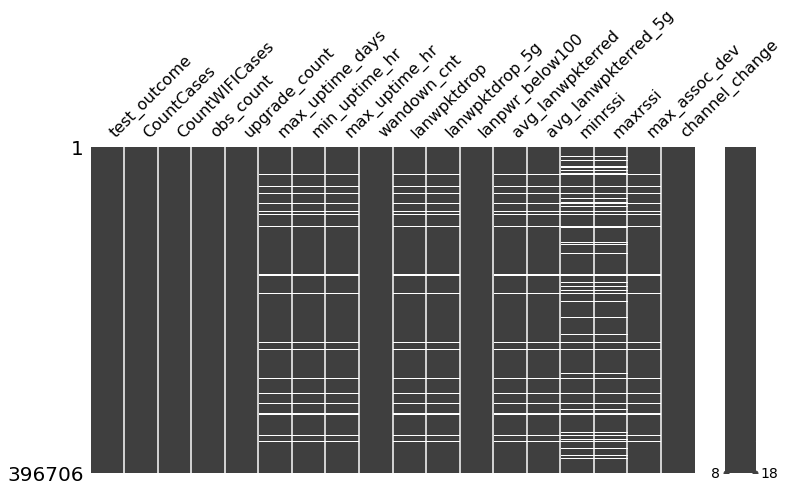

In [43]:
msno.matrix(df_new,figsize=(12,6)) 

#### from this plot we know that there are few obs that have paired missing value 

In [56]:
df_new2 = df_new.drop(df_new.index[
               (df_new["max_uptime_days"].isnull()==True)&
               (df_new["min_uptime_hr"].isnull()==True)&
               (df_new["max_uptime_hr"].isnull()==True)&
               (df_new["lanwpktdrop"].isnull()==True)&
               (df_new["lanwpktdrop_5g"].isnull()==True)&
               (df_new["avg_lanwpkterred"].isnull()==True)&
               (df_new["avg_lanwpkterred_5g"].isnull()==True)&
               (df_new["minrssi"].isnull()==True)&
               (df_new["maxrssi"].isnull()==True)&
               (df_new["max_assoc_dev"].isnull()==True)])

In [57]:
df_new2

,test_outcome,CountCases,CountWIFICases,obs_count,upgrade_count,max_uptime_days,min_uptime_hr,max_uptime_hr,wandown_cnt,lanwpktdrop,lanwpktdrop_5g,lanpwr_below100,avg_lanwpkterred,avg_lanwpkterred_5g,minrssi,maxrssi,max_assoc_dev,channel_change
bcn_num,,,,,,,,,,,,,,,,,,
NL20H682,0,2,0,43.0,2.0,30.0,5.0,723.0,0.0,0.0,618831.0,0.0,0.0,2623.0,54.0,87.0,4.0,2.0
NM20BGH8,0,3,0,47.0,1.0,34.0,2.0,820.0,0.0,0.0,3592059.0,0.0,0.0,266.0,57.0,88.0,3.0,3.0
NS206FC5,0,0,0,4.0,1.0,4.0,31.0,103.0,0.0,0.0,0.0,0.0,0.0,519.0,NaN,NaN,0.0,1.0
NM20HLAB,0,9,1,51.0,2.0,73.0,6.0,1760.0,0.0,0.0,609518.0,0.0,0.0,385.0,NaN,NaN,4.0,2.0
NN21CJHA,0,0,0,45.0,2.0,61.0,15.0,1484.0,0.0,32017.0,181616.0,0.0,844.0,4436.0,45.0,68.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NL20CXFZ,0,2,0,55.0,2.0,47.0,22.0,1130.0,55.0,0.0,2956289.0,0.0,0.0,67715.0,49.0,52.0,1.0,3.0
NN20E998,1,3,0,48.0,2.0,0.0,1.0,23.0,0.0,0.0,88063.0,0.0,0.0,20.0,44.0,74.0,2.0,2.0
NL20V9KF,0,1,0,54.0,1.0,80.0,567.0,1935.0,0.0,195975.0,35318346.0,0.0,4302.0,1086.0,59.0,88.0,2.0,2.0


<AxesSubplot:>

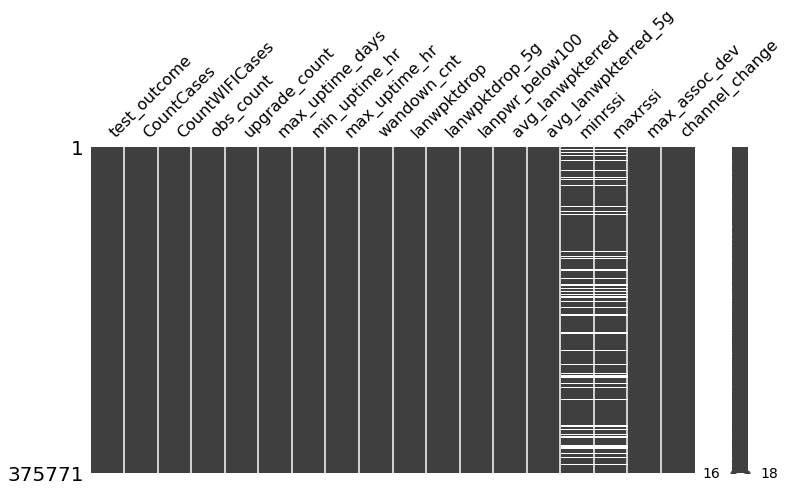

In [58]:
msno.matrix(df_new2,figsize=(12,6)) 

In [65]:
df_pairwise = df_new2.drop(df_new2.index[
               (df_new2["minrssi"].isnull()==True)&
               (df_new2["maxrssi"].isnull()==True) ])

In [67]:
df_pairwise.isna().sum() 

test_outcome           0
CountCases             0
CountWIFICases         0
obs_count              0
upgrade_count          0
max_uptime_days        0
min_uptime_hr          0
max_uptime_hr          0
wandown_cnt            0
lanwpktdrop            0
lanwpktdrop_5g         0
lanpwr_below100        0
avg_lanwpkterred       0
avg_lanwpkterred_5g    0
minrssi                0
maxrssi                0
max_assoc_dev          0
channel_change         0
dtype: int64

In [70]:
df_listwise.shape

(333243, 18)

In [71]:
df_pairwise.shape

(333243, 18)

#### turns out through listwise or pairwise i got same amount of obs 

In [74]:
df=df_pairwise

,test_outcome,CountCases,CountWIFICases,obs_count,upgrade_count,max_uptime_days,min_uptime_hr,max_uptime_hr,wandown_cnt,lanwpktdrop,lanwpktdrop_5g,lanpwr_below100,avg_lanwpkterred,avg_lanwpkterred_5g,minrssi,maxrssi,max_assoc_dev,channel_change
bcn_num,,,,,,,,,,,,,,,,,,
NL20H682,0,2,0,43.0,2.0,30.0,5.0,723.0,0.0,0.0,618831.0,0.0,0.0,2623.0,54.0,87.0,4.0,2.0
NM20BGH8,0,3,0,47.0,1.0,34.0,2.0,820.0,0.0,0.0,3592059.0,0.0,0.0,266.0,57.0,88.0,3.0,3.0
NN21CJHA,0,0,0,45.0,2.0,61.0,15.0,1484.0,0.0,32017.0,181616.0,0.0,844.0,4436.0,45.0,68.0,3.0,2.0
NM205KL0,0,1,0,55.0,2.0,37.0,3.0,900.0,0.0,1412.0,54583583.0,0.0,74.0,15405.0,38.0,71.0,2.0,2.0
NM20QY59,0,0,0,53.0,2.0,13.0,2.0,325.0,0.0,226350.0,3698711.0,0.0,5990.0,1054.0,39.0,91.0,17.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NL20CXFZ,0,2,0,55.0,2.0,47.0,22.0,1130.0,55.0,0.0,2956289.0,0.0,0.0,67715.0,49.0,52.0,1.0,3.0
NN20E998,1,3,0,48.0,2.0,0.0,1.0,23.0,0.0,0.0,88063.0,0.0,0.0,20.0,44.0,74.0,2.0,2.0
NL20V9KF,0,1,0,54.0,1.0,80.0,567.0,1935.0,0.0,195975.0,35318346.0,0.0,4302.0,1086.0,59.0,88.0,2.0,2.0


## Declare feature vector and target variable

In [115]:
X = df.drop(['test_outcome'], axis=1)
y = df['test_outcome']

In [139]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [134]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((266594, 17), (66649, 17))

# Feature Scaling

In [135]:
X_train.describe()

,CountCases,CountWIFICases,obs_count,upgrade_count,max_uptime_days,min_uptime_hr,max_uptime_hr,wandown_cnt,lanwpktdrop,lanwpktdrop_5g,lanpwr_below100,avg_lanwpkterred,avg_lanwpkterred_5g,minrssi,maxrssi,max_assoc_dev,channel_change
count,266594.000000,266594.000000,266594.000000,266594.000000,266594.000000,266594.000000,266594.000000,266594.000000,2.665940e+05,2.665940e+05,266594.000000,2.665940e+05,2.665940e+05,266594.000000,266594.000000,266594.000000,266594.000000
mean,2.032754,0.103059,47.791154,1.752132,40.007723,23.145266,971.608618,18.949571,1.281225e+06,2.918156e+07,0.026415,8.703560e+04,9.322285e+04,40.572999,75.034990,4.479534,2.215823
std,3.201844,0.393012,13.045434,0.464261,19.686539,94.141277,472.502454,24.824884,2.556117e+07,9.617733e+07,1.146525,5.513209e+06,6.318652e+06,13.384969,12.548529,3.498876,0.791183
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-81.000000,-43.000000,0.000000,1.000000
25%,0.000000,0.000000,45.000000,1.000000,26.000000,2.000000,624.000000,0.000000,0.000000e+00,8.053770e+05,0.000000,0.000000e+00,5.280000e+02,32.000000,68.000000,2.000000,2.000000
50%,1.000000,0.000000,53.000000,2.000000,39.000000,6.000000,937.000000,0.000000,1.531150e+04,5.070830e+06,0.000000,6.410000e+02,2.106000e+03,40.000000,78.000000,4.000000,2.000000
75%,3.000000,0.000000,56.000000,2.000000,54.000000,14.000000,1313.000000,50.000000,1.479925e+05,2.062140e+07,0.000000,6.563000e+03,8.786000e+03,48.000000,85.000000,6.000000,3.000000
max,150.000000,12.000000,61.000000,5.000000,247.000000,4462.000000,5950.000000,61.000000,2.147484e+09,2.147484e+09,60.000000,1.830318e+09,1.671302e+09,94.000000,95.000000,82.000000,11.000000


In [140]:
# Normalizing the features

from sklearn.preprocessing import MinMaxScaler

index_train = X_train.index
index_test = X_test.index


n_scaler = MinMaxScaler()
X_train = pd.DataFrame(n_scaler.fit_transform(X_train), index=index_train, columns=X.columns)
X_test = pd.DataFrame(n_scaler.transform(X_test), index=index_test, columns=X.columns)

#### now i have X_train dataset ready to be fed into the Logistic Regression classifier

## Training Model

In [124]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=42)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

## Result Prediction 

In [125]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Accuracy

In [126]:
from sklearn.metrics import accuracy_score

print('The accuracy score is: %.3f' % accuracy_score(y_train, logreg.predict(X_train)))

The accuracy score is: 0.947


In [145]:
#Calculating Variance Inflation Factor (VIF):

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns

vif.round(1)

,VIF Factor,features
0,1.7,CountCases
1,1.3,CountWIFICases
2,21.5,obs_count
3,4.5,upgrade_count
4,22835.9,max_uptime_days
5,1.3,min_uptime_hr
6,23281.5,max_uptime_hr
7,1.7,wandown_cnt
8,1.0,lanwpktdrop
9,1.2,lanwpktdrop_5g


#### VIF of  max_uptime_days ,max_uptime_hour, and maxrssi is too large, so we need to drop it

In [162]:
df=df.drop(labels=["max_uptime_days","max_uptime_hr","maxrssi"],axis=1)

## Repeat The Process of Building Model

In [163]:
X = df.drop(['test_outcome'], axis=1)

y = df['test_outcome']

In [164]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [165]:
# Normalizing the features

from sklearn.preprocessing import MinMaxScaler

index_train = X_train.index
index_test = X_test.index


n_scaler = MinMaxScaler()
X_train = pd.DataFrame(n_scaler.fit_transform(X_train), index=index_train, columns=X.columns)
X_test = pd.DataFrame(n_scaler.transform(X_test), index=index_test, columns=X.columns)

In [166]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=42)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [167]:
#Calculating Variance Inflation Factor (VIF):

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns

vif.round(1)

,VIF Factor,features
0,1.7,CountCases
1,1.3,CountWIFICases
2,15.8,obs_count
3,4.4,upgrade_count
4,1.2,min_uptime_hr
5,1.7,wandown_cnt
6,1.0,lanwpktdrop
7,1.1,lanwpktdrop_5g
8,1.0,lanpwr_below100
9,1.0,avg_lanwpkterred


#### From table above i conclude that there is multicolinearity because VIF >10

## Creating the Reduced Model

In [156]:
#Function for Stepwise Feature Selection:

def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features, dtype='float64')
        for new_column in remaining_features:
            model = sm.Logit(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.Logit(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [168]:
# Stepwise Feature Selection:

features = stepwise_selection(X_train, y_train)

Optimization terminated successfully.
         Current function value: 0.206481
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206257
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.206459
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206478
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206479
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206466
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.205683
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206441
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206482
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.206478
  

In [169]:
print(features)

['wandown_cnt', 'CountCases', 'max_assoc_dev', 'lanwpktdrop_5g', 'lanpwr_below100']


In [170]:
# Reducing training and test set to the selected features:

re_X_train = X_train[features]
re_X_test = X_test[features]

In [171]:
# Calculating VIF for the reduced features:

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(re_X_train.values, i) for i in range(re_X_train.shape[1])]
vif["features"] = re_X_train.columns

vif.round(1)

,VIF Factor,features
0,1.4,wandown_cnt
1,1.3,CountCases
2,1.6,max_assoc_dev
3,1.1,lanwpktdrop_5g
4,1.0,lanpwr_below100


In [173]:
#Creating the reduced model: 

logreg2 = LogisticRegression().fit(re_X_train, y_train)

print('The accuracy score is: %.3f' % accuracy_score(y_train, logreg2.predict(re_X_train)))


The accuracy score is: 0.947


In [174]:
# New variables' coeficients:

np.round(logreg2.coef_, 2)

array([[-0.44,  4.94,  1.93, -2.08,  0.61]])

In [175]:
np.round(logreg2.intercept_, 2)

array([-2.92])

In [176]:
# Model scores with the test datapoints:

print('The accuracy score is: %.3f' % accuracy_score(y_test, logreg2.predict(re_X_test)))

The accuracy score is: 0.946


In [197]:
y_pred_test = logreg2.predict(re_X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Confusion Matrix

In [198]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[63030     0]
 [ 3619     0]]

True Positives(TP) =  63030

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  3619


<AxesSubplot:>

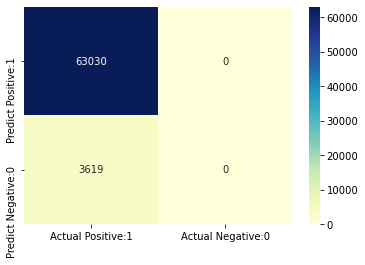

In [196]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#### The confusion matrix shows 63030 + 3619 = 66649 correct predictions (all prediction on test dataset)

## Classification Report

In [181]:
from sklearn.metrics import classification_report

print(classification_report(y_test, logreg2.predict(re_X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     63030
           1       0.00      0.00      0.00      3619

    accuracy                           0.95     66649
   macro avg       0.47      0.50      0.49     66649
weighted avg       0.89      0.95      0.92     66649



C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [182]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [183]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9457


In [184]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0543


In [185]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [186]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9457


In [187]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9457


In [188]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : nan


<ipython-input-188-c3df7cb2d5b9>:1: RuntimeWarning: invalid value encountered in true_divide
  false_positive_rate = FP / float(FP + TN)


In [189]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : nan


<ipython-input-189-d9fdb34c59d3>:1: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity = TN / (TN + FP)


## Final Model

In [ ]:
#Final model: 

logreg2 = LogisticRegression().fit(re_X_train, y_train)

In [ ]:
#Predict Result
y_pred_test = logreg2.predict(X_test)

Variable included in Final Model :
1. 'wandown_cnt', 
2. 'CountCases'
3. 'max_assoc_dev',
4. 'lanwpktdrop_5g' 
5. 'lanpwr_below100'